# Text embeddings
In this notebook we take a look under the hood how large language models (LLMs) work. At their very core, LLMs express words, sentences and texts as vectors of numbers. We will just visualize some of these embeddings.

In [1]:
import openai
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

This short helper function will allow us to turn texts into vector embeddings. We use the [embedding model Qwen 3](https://huggingface.co/Qwen/Qwen3-Embedding-4B) to demonstrate this.

In [3]:
def embed(text, model="Qwen/Qwen3-Embedding-4B"):
    import os
    from openai import OpenAI
    client = OpenAI(base_url="https://llm.scads.ai/v1",
                    api_key=os.environ.get('SCADSAI_API_KEY'))

    response = client.embeddings.create(
        input=text,
        model=model
    )
    return response.data[0].embedding

The function returns a vector `v` which is a list of numbers.

In [4]:
v = embed("hello world")

len(v)

2560

In [5]:
v[:5]

[0.0001030213970807381,
 -0.02199709229171276,
 0.011862305924296379,
 0.03385939821600914,
 0.0005146571202203631]

This helper function allows us to draw embeddings of words.
To visualize the 2560 dimensions, we apply [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis) first.

In [6]:
def draw_embedding(words):
    # Example of input dictionary
    object_coords = {word: embed(word) for word in words}
    
    # Extract names and numerical lists
    names = list(object_coords.keys())
    data_matrix = np.array(list(object_coords.values()))
    
    # Apply PCA
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    transformed_data = pca.fit_transform(data_matrix)
    
    # Create scatter plot
    plt.figure(figsize=(3, 3))
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    
    # Annotate data points with names
    for i, name in enumerate(names):
        plt.annotate(name, (transformed_data[i, 0], transformed_data[i, 1]))
    
    plt.title('PCA of text embedding')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

This is how a word embedding looks like:

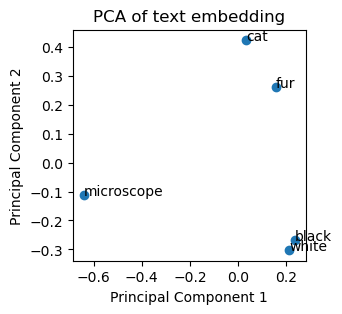

In [7]:
words = ["microscope", "cat", "fur", "black", "white"]

draw_embedding(words)

A text embedding works analogously. Note that scientists may use different models for texts and words. We just use the same here for demonstration purposes.

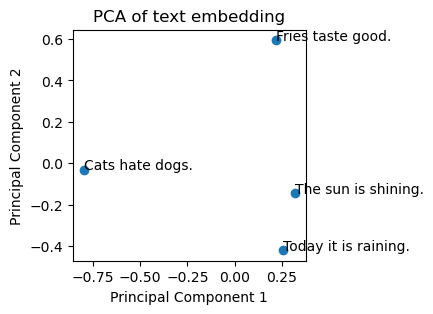

In [8]:
sentences = ["The sun is shining.",
             "Today it is raining.",
             "Fries taste good.",
             "Cats hate dogs."]

draw_embedding(sentences)

## Exercise
Take terms or sentences from your scientific domain and draw an embedding for them.

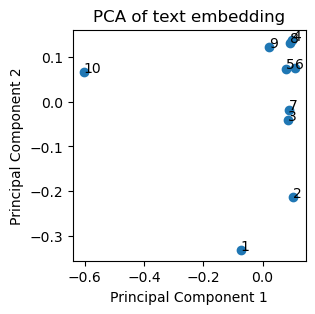

In [11]:
sentences = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]

draw_embedding(sentences)